In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os
path = "tutorials/coursera/data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


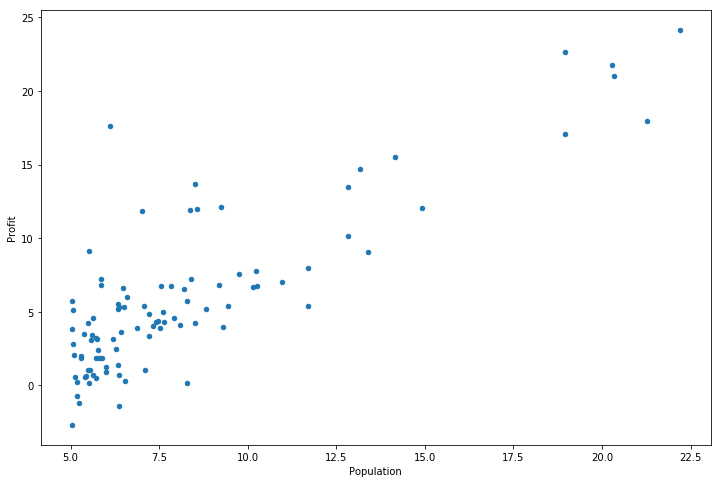

In [10]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [12]:
def computeCost(X, y, theta):
    costs = np.power(((X * theta.T) - y), 2)
    cost = np.sum(costs) / (2 * len(X))   
    return cost

In [13]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = np.matrix(data.iloc[:,:cols-1])
y = np.matrix(data.iloc[:,cols-1:cols])
theta = np.matrix(np.array([0,0]))

computeCost(X, y, theta)

32.072733877455676

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) 
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [49]:
alpha = 0.021
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)
computeCost(X, y, g)

4.477702136928591

Text(0.5,1,'Predicted Profit vs. Population Size')

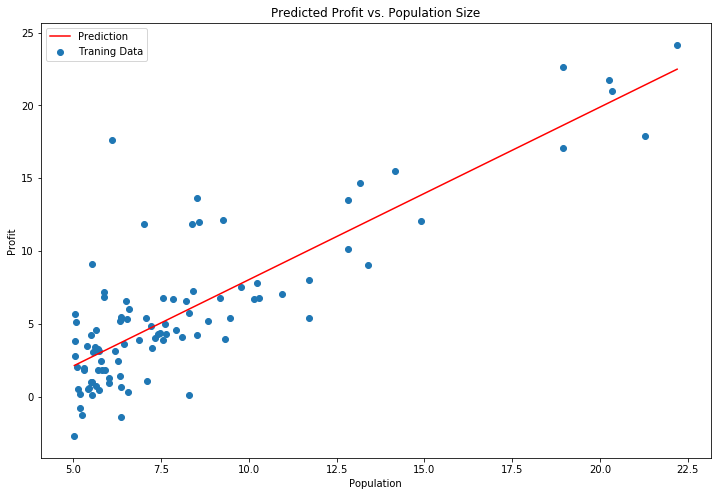

In [50]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')